In [69]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import nltk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# load data and take a quick look
raw_data = pd.read_csv('coursework1_train.csv')
raw_data.head()

,Unnamed: 0,text,sentiment
0,0,Enjoy the opening credits. They're the best th...,neg
1,1,"Well, the Sci-Fi channel keeps churning these ...",neg
2,2,It takes guts to make a movie on Gandhi in Ind...,pos
3,3,The Nest is really just another 'nature run am...,neg
4,4,Waco: Rules of Engagement does a very good job...,pos


In [125]:
all_text = raw_data['text'].tolist()
all_lables = raw_data['sentiment'].tolist()
print('entry num', len(all_text))
print('num of pos entries', len([l for l in all_lables if l=='pos']))
print('num of neg entries', len([l for l in all_lables if l=='neg']))
train_text = all_text[:35000]
train_labels = all_lables[:35000]
test_text = all_text[35000:]
test_labels = all_lables[35000:]
train_text_final = all_text[:40000]
train_labels_final = all_lables[:40000]

entry num 40000
num of pos entries 20000
num of neg entries 20000


# Section1 : 

In [66]:
#fetching stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [67]:
raw_data_neg_sentence = raw_data['text'][raw_data['sentiment']== 'neg']
# pd.DataFrame(raw_data_neg_sentence,columns)

In [68]:
raw_data_list = raw_data['text'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(raw_data_list)
word_freq_dist = nltk.FreqDist(words)
Freq_words_count = pd.DataFrame(word_freq_dist.most_common(),columns=['Word', 'Frequency'])

<BarContainer object of 5 artists>

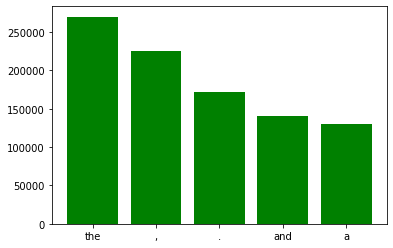

In [72]:
# positive words freq list
raw_data_pos = raw_data['text'][raw_data['sentiment']== 'pos'].str.lower().str.cat(sep='')
pos_words = nltk.tokenize.word_tokenize(raw_data_pos)
word_freq_dist_pos = nltk.FreqDist(pos_words)
Freq_words_count_pos = pd.DataFrame(word_freq_dist_pos.most_common(),columns=['Word', 'Frequency'])
plt.bar(Freq_words_count_pos['Word'][:5], Freq_words_count_pos['Frequency'][:5], color='green')

In [13]:
# negative words list 
raw_data_neg = raw_data['text'][raw_data['sentiment']== 'neg'].str.lower().str.cat(sep=' ')
neg_words = nltk.tokenize.word_tokenize(raw_data_neg)
word_freq_dist_neg = nltk.FreqDist(neg_words)
Freq_words_count_neg = pd.DataFrame(word_freq_dist_neg.most_common(),columns=['Word', 'Frequency'])
Freq_words_count_neg

,Word,Frequency
0,the,259485
1,",",209737
2,.,186742
3,a,126123
4,and,117807
...,...,...
98625,half/rest,1
98626,stupid=funny,1
98627,fallin,1
98628,synced,1


In [15]:
# number of stop words, punctuation in pos and neg
import string
punctuation = list(string.punctuation)
stop_words_punctuation_df = pd.DataFrame(stop_words + punctuation,columns = ['Word'])

,Word
0,i
1,me
2,my
3,myself
4,we
...,...
206,`
207,{
208,|
209,}


In [16]:
stop_words_punctuation_freq_pos = stop_words_punctuation_df.merge(Freq_words_count_pos, on = 'Word',how='inner')
stop_words_punctuation_freq_pos.sort_values(by=['Frequency'],ascending=False)

,Word,Frequency
55,the,269949
156,",",225413
158,.,171531
56,and,140333
53,a,130072
64,of,120744
79,to,104265
38,is,91082
159,/,78481
83,in,78446


In [17]:
stop_words_punctuation_freq_neg = stop_words_punctuation_df.merge(Freq_words_count_neg, on = 'Word',how='inner')
stop_words_punctuation_freq_neg.sort_values(by=['Frequency'],ascending=False)

,Word,Frequency
55,the,259485
159,",",209737
161,.,186742
53,a,126123
56,and,117807
64,of,109436
79,to,108890
162,/,82883
167,>,82841
165,<,82771


In [18]:
stop_words_punctuation_freq_comp_ngpos=stop_words_punctuation_freq_neg.merge(stop_words_punctuation_freq_pos, on = 'Word',how='inner')
stop_words_punctuation_freq_comp_ngpos['Difference'] = abs(stop_words_punctuation_freq_comp_ngpos['Frequency_x'] - stop_words_punctuation_freq_comp_ngpos['Frequency_y'])
stop_words_punctuation_freq_comp_ngpos.sort_values(by=['Difference'],ascending=False)

,Word,Frequency_x,Frequency_y,Difference
56,and,117807,140333,22526
153,",",209737,225413,15676
155,.,186742,171531,15211
0,i,73781,61740,12041
33,this,64528,52885,11643
64,of,109436,120744,11308
55,the,259485,269949,10464
162,?,17936,7681,10255
83,in,69323,78446,9123
38,is,82080,91082,9002


# Section 2 

In [75]:
# Building different sets of data
all_text = pd.DataFrame()
all_text['text'] = raw_data['text']
all_lables = raw_data['sentiment'].tolist()
# Set 1 : lemmatized data
# Set 2 : Stemmed data
import nltk
import string
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
ps_stemmer = PorterStemmer()
all_text['text_tokenized']=all_text['text'].apply(nltk.word_tokenize)
all_text['text_lemmatized']=all_text['text'].apply(nltk.word_tokenize).apply(lambda row: list(wordnet_lemmatizer.lemmatize(row[row.index(y)].lower()) for y in row))
all_text['text_stemmed']=all_text['text'].apply(nltk.word_tokenize).apply(lambda row: list(ps_stemmer.stem(row[row.index(y)].lower()) for y in row))

In [77]:
all_text['text_tokenized_stopwordspunctnum_removal'] = all_text['text_tokenized']
all_text['text_lemmatized_stopwordspunctnum_removal'] = all_text['text_lemmatized']
all_text['text_stemmed_stopwordspunctnum_removal'] = all_text['text_stemmed']       

In [79]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def word_removal(data):
    for i in range(0,35000):
        for word in data[i]:
            if word in string.punctuation: # remove all punctuations
                data[i].remove(word)
            elif word in stop_words:
                data[i].remove(word)
            elif (word.isnumeric() == True):
                data[i].remove(word)
    return data

In [81]:
all_text['text_tokenized_stopwordspunctnum_removal'] = word_removal(all_text['text_tokenized_stopwordspunctnum_removal'])
all_text['text_lemmatized_stopwordspunctnum_removal'] = word_removal(all_text['text_lemmatized_stopwordspunctnum_removal'])
all_text['text_stemmed_stopwordspunctnum_removal'] = word_removal(all_text['text_stemmed_stopwordspunctnum_removal'])

In [83]:
train_text_tokenized =[" ".join(review) for review in all_text['text_tokenized'][:35000].values]
train_text_lemmatized =[" ".join(review) for review in all_text['text_lemmatized'][:35000].values]
train_text_stemmed =[" ".join(review) for review in all_text['text_stemmed'][:35000].values]
train_text_tokenized_stopwordspunctnum_removal =[" ".join(review) for review in all_text['text_tokenized_stopwordspunctnum_removal'][:35000].values]
train_text_lemmatized_stopwordspunctnum_removal =[" ".join(review) for review in all_text['text_lemmatized_stopwordspunctnum_removal'][:35000].values]
train_text_stemmed_stopwordspunctnum_removal =[" ".join(review) for review in all_text['text_stemmed_stopwordspunctnum_removal'][:35000].values]

In [112]:
## POS TAGS 
#### removing numbers and punctuations and others using spacy
import spacy
words_withpos = pd.DataFrame(columns = ['word','ent.text', 'ent.start_char', 'ent.end_char', 'ent.label_','token.text', 'token.lemma_', 'token.pos_', 'token.tag_', 'token.dep_',
             'token.shape_','token.is_alpha', 'token.is_stop'])
nlp = spacy.load("en_core_web_sm")
for i in range(0,35000):
    doc = nlp(train_text[i])
    for ent in doc.ents:
        words_withpos[['word','ent.text', 'ent.start_char', 'ent.end_char', 'ent.label_']][i] = (word,ent.text, ent.start_char, ent.end_char, ent.label_)

# for ent in doc.ents:
#     (ent.text, ent.start_char, ent.end_char, ent.label_)
# for token in doc:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)

D:\Anaconds_Re\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [116]:
print(words_withpos['ent.text'])

Series([], Name: ent.text, dtype: object)


In [ ]:
import nltk
for i in range(0,35000):
    for (word,pos) in nltk.pos_tag(all_text['text'][i]):
        if not ((pos.startswith('JJ')) or pos.startswith('RB')):or (pos.startswith('NN')) 
            all_text['text'][i].remove(word)

# Section 3

In [20]:
# data split. 
train_text =["".join(review) for review in feature_df['Word'][:35000].values]
train_labels = all_lables[:35000]
test_text = [" ".join(review) for review in all_text['text'][35000:].values]
test_labels = all_lables[35000:]

In [11]:
# print(grid_search_tune.grid_scores_)
print("Best parameter (CV score=%0.3f):" % grid_search_tune.best_score_)
print(grid_search_tune.best_estimator_.steps)

Best parameter (CV score=0.912):
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=20000,
                max_features=None, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)), ('clf', LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False))]


In [89]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#for i in range(1,35000,1000):
#max_feature_num = 1000
def logistic(train_data,test_data,train_labels,test_labels):
    train_vectorizer = TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',input='content', lowercase=True, max_df=20000,
                max_features=None, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True)
    train_vecs = train_vectorizer.fit_transform(train_text)
    test_vecs = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(test_text)

# train model
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False).fit(train_vecs, train_labels)

# test model
    test_pred = clf.predict(test_vecs)
    from sklearn.metrics import precision_recall_fscore_support,accuracy_score
    acc = accuracy_score(test_labels, test_pred)
    pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='macro')
    # print(max_feature_num)
    print('acc', acc)
    print('precision', pre)
    print('rec', rec)
    print('f1', f1)

In [103]:
# Table of results 
print("train_text_tokenized")
logistic(train_text_tokenized,test_text,train_labels,test_labels)
print("train_text_lemmatized")
logistic(train_text_lemmatized,test_text,train_labels,test_labels)
print("train_text_stemmed")
logistic(train_text_stemmed,test_text,train_labels,test_labels)
print("train_text_tokenized_stopwordspunctnum_removal")
logistic(train_text_tokenized_stopwordspunctnum_removal,test_text,train_labels,test_labels)
print("train_text_lemmatized_stopwordspunctnum_removal")
logistic(train_text_lemmatized_stopwordspunctnum_removal,test_text,train_labels,test_labels)
print("train_text_stemmed_stopwordspunctnum_removal")
logistic(train_text_stemmed_stopwordspunctnum_removal,test_text,train_labels,test_labels)

train_text_tokenized
acc 0.89
precision 0.8899993855858439
rec 0.8899966399462391
f1 0.8899978703587701
train_text_lemmatized
acc 0.889
precision 0.8890072690598609
rec 0.8889910238563816
f1 0.8889962658343826
train_text_stemmed
acc 0.891
precision 0.8910020760747387
rec 0.8909942559080946
f1 0.8909972749318733
train_text_tokenized_stopwordspunctnum_removal
acc 0.891
precision 0.8910044800471574
rec 0.8909926558824941
f1 0.8909968214673141
train_text_lemmatized_stopwordspunctnum_removal
acc 0.8908
precision 0.8908010555211012
rec 0.8907950527208435
f1 0.8907974839740307
train_text_stemmed_stopwordspunctnum_removal
acc 0.89
precision 0.8900031745300288
rec 0.8899934398950383
f1 0.88999702551957


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([('tfidf', TfidfVectorizer(lowercase=True,max_df= 20000,stop_words = None)),('clf', LogisticRegression(solver='saga',max_iter=10000))])
param_grid = {
    
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': np.logspace(-4, 4, 4)
    
}
grid_search_tune = GridSearchCV(pipeline, param_grid,cv=5,verbose=2,n_jobs=-1)
grid_search_tune.fit(train_text, train_labels)

In [ ]:
def logistic_singleword(train_data,test_data,train_labels,test_labels):
    train_vectorizer = TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',input='content', lowercase=True, max_df=20000,
                max_features=None, min_df=1, ngram_range=False, norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True)
    train_vecs = train_vectorizer.fit_transform(train_text)
    test_vecs = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(test_text)

# train model
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False).fit(train_vecs, train_labels)

# test model
    test_pred = clf.predict(test_vecs)
    from sklearn.metrics import precision_recall_fscore_support,accuracy_score
    acc = accuracy_score(test_labels, test_pred)
    pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='macro')
    # print(max_feature_num)
    print('acc', acc)
    print('precision', pre)
    print('rec', rec)
    print('f1', f1)

In [ ]:
# Table of results 
print("train_text_tokenized")
logistic_singleword(train_text_tokenized,test_text,train_labels,test_labels)
print("train_text_lemmatized")
logistic_singleword(train_text_lemmatized,test_text,train_labels,test_labels)
print("train_text_stemmed")
logistic_singleword(train_text_stemmed,test_text,train_labels,test_labels)
print("train_text_tokenized_stopwordspunctnum_removal")
logistic_singleword(train_text_tokenized_stopwordspunctnum_removal,test_text,train_labels,test_labels)
print("train_text_lemmatized_stopwordspunctnum_removal")
logistic_singleword(train_text_lemmatized_stopwordspunctnum_removal,test_text,train_labels,test_labels)
print("train_text_stemmed_stopwordspunctnum_removal")
logistic_singleword(train_text_stemmed_stopwordspunctnum_removal,test_text,train_labels,test_labels)

In [87]:
#feature_names = train_vectorizer.get_feature_names()

In [104]:
def logistic_singleword_changing_max_features(train_data,test_data,train_labels,test_labels):
    train_vectorizer = TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',input='content', lowercase=True, max_df=20000,
                max_features=17001, min_df=1, ngram_range=(1,4), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True)
    train_vecs = train_vectorizer.fit_transform(train_text)
    test_vecs = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(test_text)

# train model
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False).fit(train_vecs, train_labels)

# test model
    test_pred = clf.predict(test_vecs)
    from sklearn.metrics import precision_recall_fscore_support,accuracy_score
    acc = accuracy_score(test_labels, test_pred)
    pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='macro')
    # print(max_feature_num)
    print('acc', acc)
    print('precision', pre)
    print('rec', rec)
    print('f1', f1)

In [ ]:
# Table of results 
print("train_text_tokenized")
logistic_singleword_changing_max_features(train_text_tokenized,test_text,train_labels,test_labels)
print("train_text_lemmatized")
logistic_singleword_changing_max_features(train_text_lemmatized,test_text,train_labels,test_labels)
print("train_text_stemmed")
logistic_singleword_changing_max_features(train_text_stemmed,test_text,train_labels,test_labels)
print("train_text_tokenized_stopwordspunctnum_removal")
logistic_singleword_changing_max_features(train_text_tokenized_stopwordspunctnum_removal,test_text,train_labels,test_labels)
print("train_text_lemmatized_stopwordspunctnum_removal")
logistic_singleword_changing_max_features(train_text_lemmatized_stopwordspunctnum_removal,test_text,train_labels,test_labels)
print("train_text_stemmed_stopwordspunctnum_removal")
logistic_singleword_changing_max_features(train_text_stemmed_stopwordspunctnum_removal,test_text,train_labels,test_labels)

In [86]:
# Trying out with 2 tf-idf vectors one with single words and the other with ngrams for a homogenous dataset

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
def feature_union(train_data,test_data,train_labels,test_labels):
    
    pipeline = Pipeline([
    

        # Use FeatureUnion to combine the features 
        ('union', FeatureUnion(
            transformer_list=[

                
                ('tfidf1', Pipeline([
                
                    ('tfidf1', TfidfVectorizer(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                    encoding='utf-8',input='content', lowercase=True, max_df=20000,
                    max_features=None, min_df=1, ngram_range=(1, 4), norm='l2',
                    preprocessor=None, smooth_idf=True, stop_words=None,
                    strip_accents=None, sublinear_tf=False,
                    token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True))),
                ])),

                
                ('tfidf2', Pipeline([
                
                    ('tfidf1', TfidfVectorizer(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                    encoding='utf-8',input='content', lowercase=True, max_df=20000,
                    max_features=None, min_df=1, ngram_range=False, norm='l2',
                    preprocessor=None, smooth_idf=True, stop_words= 'english',
                    strip_accents=None, sublinear_tf=False,
                    token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True))),
                
                ])),

            

            ],

            # weight components in FeatureUnion
            transformer_weights={
                'tfidf1': 0.5,
                'tfidf2': 0.5,
            
            },
        )),

        # Use a logistic classifier on the combined features
        ('logistic', LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                       intercept_scaling=1, l1_ratio=None, max_iter=10000,
                       multi_class='warn', n_jobs=None, penalty='l2',
                       random_state=None, solver='saga', tol=0.0001, verbose=0,
                       warm_start=False)),
    ])
    pipeline.fit(train_text, train_labels)
    y = pipeline.predict(test_text)
    print(classification_report(y, test_labels))

In [ ]:
print("train_text_tokenized")
feature_union(train_text_tokenized,test_text,train_labels,test_labels)
print("train_text_lemmatized")
feature_union(train_text_lemmatized,test_text,train_labels,test_labels)
print("train_text_stemmed")
feature_union(train_text_stemmed,test_text,train_labels,test_labels)
print("train_text_tokenized_stopwordspunctnum_removal")
feature_union(train_text_tokenized_stopwordspunctnum_removal,test_text,train_labels,test_labels)
print("train_text_lemmatized_stopwordspunctnum_removal")
feature_union(train_text_lemmatized_stopwordspunctnum_removal,test_text,train_labels,test_labels)
print("train_text_stemmed_stopwordspunctnum_removal")
feature_union(train_text_stemmed_stopwordspunctnum_removal,test_text,train_labels,test_labels)

In [118]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    

    # Use FeatureUnion to combine the features 
    ('union', FeatureUnion(
        transformer_list=[

            
            ('tfidf1', Pipeline([
                
                ('tfidf1', TfidfVectorizer(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',input='content', lowercase=True, max_df=20000,
                max_features=None, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True))),
            ])),

            
            ('tfidf2', Pipeline([
                
                ('tfidf2', TfidfVectorizer(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',input='content', lowercase=True, max_df=20000,
                max_features=None, min_df=1, ngram_range=False, norm='l2',
                preprocessor=None, smooth_idf=True, stop_words= 'english',
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True))),
                
            ])),

            

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'tfidf1': 0.5,
            'tfidf2': 0.5,
            
        },
    )),

    # Use a logistic classifier on the combined features
    ('logistic', LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)),
])

In [119]:
pipeline.fit(train_text, train_labels)

Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('tfidf1',
                                                 Pipeline(memory=None,
                                                          steps=[('tfidf1',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  encoding='utf-8',
                                                                                  input=TfidfVectorizer(analyzer='word',
                                                                     

In [120]:
from sklearn.metrics import classification_report
y = pipeline.predict(test_text)
print(classification_report(y, test_labels))

              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      2493
         pos       0.89      0.89      0.89      2507

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [130]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#max_feature_num = 17001
train_vectorizer = TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',input='content', lowercase=True, max_df=20000,
                max_features=None, min_df=1, ngram_range=(1,2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True)
train_vecs = train_vectorizer.fit_transform(train_text_tokenized_stopwordspunctnum_removal)
test_vecs = TfidfVectorizer(max_features=max_feature_num,vocabulary=train_vectorizer.vocabulary_).fit_transform(test_text)

# train model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False).fit(train_vecs, train_labels)

# test model
test_pred = clf.predict(test_vecs)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='macro')
print(max_feature_num)
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

17001
acc 0.893
precision 0.8930564950946855
rec 0.892976687627002
f1 0.8929905446445249


In [134]:
import pickle

# save model and other necessary modules
all_info_want_to_save = {
    'model': clf,
    'vectorizer':TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',input='content', lowercase=True, max_df=20000,
                max_features=None, min_df=1, ngram_range=(1,2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,vocabulary=train_vectorizer.vocabulary_) 
}
save_path = open("sample_trained_model.pickle","wb")
pickle.dump(all_info_want_to_save, save_path)